# Who won the most medals at the Olympics?

To start a quest like this, get a dataset from KAGGLE containing Olympic data from 1896 to through the last games in 2016.  It has just over 270,000 entries and 17 categories. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

data = pd.read_csv('athlete_events.csv')
df = pd.DataFrame(data)

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Medal                                            Bronze  Silver  Gold  Total
Name                                                                        
Michael Fred Phelps, II                               2       3    23     28
Larysa Semenivna Latynina (Diriy-)                    4       5     9     18
Nikolay Yefimovich Andrianov                          3       5     7     15
Takashi Ono                                           4       4     5     13
Borys Anfiyanovych Shakhlin                           2       4     7     13
Ole Einar Bjrndalen                                   1       4     8     13
Edoardo Mangiarotti                                   2       5     6     13
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)       1       3     8     12
Birgit Fischer-Schmidt                                0       4     8     12
Dara Grace Torres (-Hoffman, -Minas)                  4       4     4     12
Natalie Anne Coughlin (-Hall)                         5       4     3     12

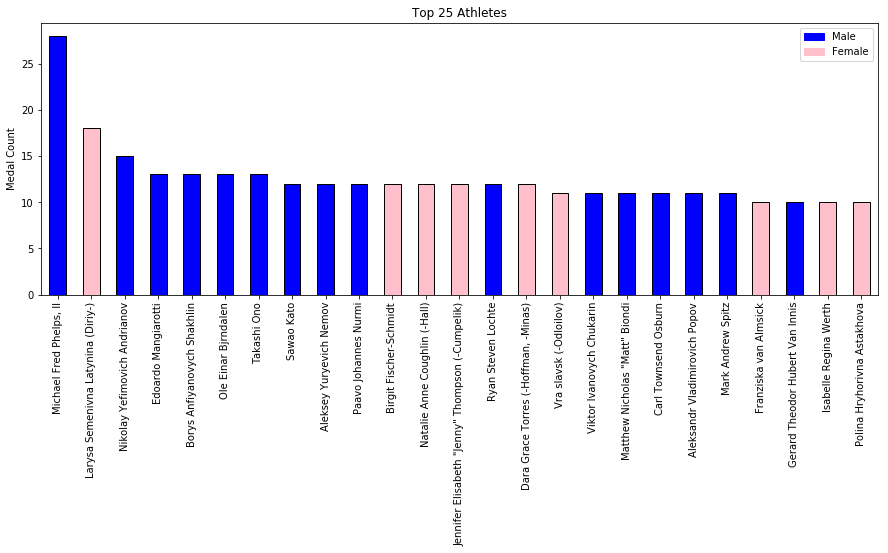

In [2]:
#which athlete won the most medals?

athlete_medals = df.groupby('Name')['Medal'].count().sort_values(ascending=False).head(25)

top_medal = athlete_medals.values[0]
top_athlete = athlete_medals.index[0]
top_country = df.NOC[df['Name']==top_athlete].values[0]

top_medal1 = athlete_medals.values[1]
top_athlete1 = athlete_medals.index[1]
top_country1 = df.NOC[df['Name']==top_athlete1].values[0]

comp = df[df['Name'].isin(athlete_medals.index)]
comp = comp[['Name', 'Age', 'Year', 'Medal', 'Event', 'NOC']]

medal_breakdown = comp.pivot_table(index=['Name'], columns='Medal', values='Event', aggfunc='count', fill_value=0)
medal_breakdown = medal_breakdown[['Bronze', 'Silver', 'Gold']]
medal_breakdown['Total'] = medal_breakdown.sum(axis=1)
medal_breakdown = medal_breakdown.reindex(comp.groupby('Name')['Medal'].count().sort_values(ascending=False).index)
print(medal_breakdown)

mp = df[df['Name']==top_athlete].pivot_table(index=['Name', 'Year'], columns='Medal', values='Event', aggfunc='count', fill_value=0)
mp = mp[['Bronze', 'Silver', 'Gold']]
mp['Total'] = mp.sum(axis=1)
lsl = df[df['Name']==top_athlete1].pivot_table(index=['Name', 'Year'], columns='Medal', values='Event', aggfunc='count', fill_value=0)
lsl = lsl[['Bronze', 'Silver', 'Gold']]
lsl['Total'] = lsl.sum(axis=1)
print('\n')
print(mp)
print(lsl)

# show the events that the top two athletes competed in
top_events = df.Event[df['Name']==top_athlete].unique()
top_events1 = df.Event[df['Name']==top_athlete1].unique()

top_years = df.Year[df['Name']==top_athlete].unique()
top_years1 = df.Year[df['Name']==top_athlete1].unique()

top_age = df.Age[df['Name']==top_athlete].unique()
top_age1 = df.Age[df['Name']==top_athlete1].unique()

print('\n')
print('{} began competing at age {}.  He competed for team {} from {} to {} in the follow events: \n'.format(top_athlete, int(top_age[0]), top_country, top_years[0], top_years[-1]) + '\n'.join(map(str,top_events)))
print('\n')
print('{} began competing at age {}. She competed for team {} from {} to {} in the follow events: \n'.format(top_athlete1[:-9], int(top_age1[0]), top_country1, top_years1[0], top_years1[-1]) + '\n'.join(map(str,top_events1)))

#plot the top 10 athletes by medals
fig = plt.figure(figsize=(15,5))
names = athlete_medals.index.tolist()
sex = df[df['Name'].isin(names)]

top_males = sex.groupby('Sex')['Name'].get_group('M').unique().tolist()
top_females = sex.groupby('Sex')['Name'].get_group('F').unique().tolist()

my_color = np.where(athlete_medals.index.isin(top_females), 'pink', 'blue')
blue_patch = mpatches.Patch(color='blue', label='Male')
pink_patch = mpatches.Patch(color='pink', label='Female')

athlete_medals.plot(kind='bar', color=my_color, edgecolor='k', title='Top 25 Athletes')
plt.ylabel('Medal Count')
plt.xlabel('')
plt.legend(handles=[blue_patch, pink_patch])
plt.show()

The top 25 medal winners of all time are plotted above.  The blue color bars indicates male athlete while the pink indicates female.  Michael Phelps (M) of the USA is the athlete with the most medals at 28 and the second most medalled athlete is Larysa Semenivna Latynina (F) of the Soviet Union with 18.  Phelps began competing in the Olympics at age 15 in 2000 as a swimmer.  He finished his final games in 2016.  In addition to being the most medalled Olympian of all time, he also holds the record for the most medals and most golds won in a single Olympics.  Looking deeper into the plot above, 9 of the 25 athletes are female.  This stands out as interesting, so let's dive into this.

**What is the number of medals won by males vs. females?**

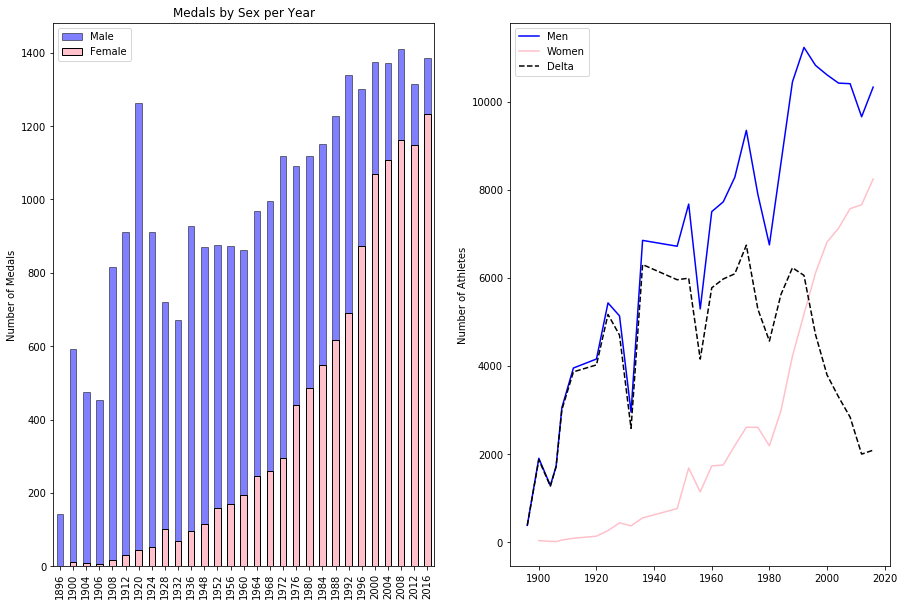

The percentage of women in the Olymipcs is 38%


In [3]:
#men vs women medals by year
men = df[df['Sex'] == 'M']
women = df[df['Sex'] == 'F']

#combine winter and summer after 1992
men_combo = men.groupby('Year')['Medal', 'Name'].count()
men_combo = men_combo[men_combo.index>=1994].reset_index()

summermen = men_combo[men_combo.index %2 == 0]
mens_medal_summer = summermen['Medal'].tolist()
mens_athlete_summer = summermen['Name'].tolist()

wintermen = men_combo[men_combo.index %2 != 0]
mens_medal_winter = wintermen['Medal'].tolist()
mens_athlete_winter = wintermen['Name'].tolist()

summed_medals = [x+y for x,y in zip(mens_medal_summer, mens_medal_winter)]
summed_athletes = [x+y for x,y in zip(mens_athlete_summer, mens_athlete_winter)]

women_combo = women.groupby('Year')['Medal', 'Name'].count()
women_combo = women_combo[women_combo.index>=1994].reset_index()

summerwomen = women_combo[women_combo.index %2 == 0]
women_medal_summer = summerwomen['Medal'].tolist()
women_athlete_summer = summerwomen['Name'].tolist()

winterwomen = women_combo[women_combo.index %2 != 0]
women_medal_winter = winterwomen['Medal'].tolist()
women_athlete_winter = winterwomen['Name'].tolist()

summed_women_medals = [x+y for x,y in zip(women_medal_summer, women_medal_winter)]
summed_women_athletes = [x+y for x,y in zip(women_athlete_summer, women_athlete_winter)]


#replace the summer values after 1992 with the sums and drop the winter months
drop_yrs = [1994, 1998, 2002, 2006, 2010, 2014]
rep_yrs = [1996, 2000, 2004, 2008, 2012, 2016]

mens_medals = men.groupby('Year')['Medal'].count()
mens_medals = mens_medals.drop(drop_yrs)
mens_medals.loc[rep_yrs] = summed_medals

womens_medals = women.groupby('Year')['Medal'].count()
womens_medals.loc[1896] = 0
womens_medals = womens_medals.sort_index()
womens_medals = womens_medals.drop(drop_yrs)
womens_medals.loc[rep_yrs] = summed_women_medals
#print(type(womens_medals))
#print(womens_medals)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,10))
mens_medals.plot(kind='bar', color='blue', alpha=.5, edgecolor='black', ax=ax1)
womens_medals.plot(kind='bar', color='pink', edgecolor='black', title='Medals by Sex per Year', ax=ax1)
ax1.set_ylabel('Number of Medals')
ax1.set_xlabel('')
leg = ax1.legend(['Male', 'Female'])

#check the number of men and women athletes over time
men_yr = men.groupby('Year')['Name'].count()
men_yr = men_yr.drop(drop_yrs)
men_yr.loc[rep_yrs] = summed_athletes

women_yr = women.groupby('Year')['Name'].count()
women_yr = women_yr.drop(drop_yrs)
women_yr.loc[rep_yrs] = summed_women_athletes

mf_delta = men_yr-women_yr
mf_delta.loc[1896]=men_yr.loc[1896]

test = pd.concat([men_yr, women_yr, mf_delta], axis=1)
test.columns = ['Men', 'Women', 'Delta']
#print(test)

men_yr.plot(kind='line', color='blue', ax=ax2)
women_yr.plot(kind='line', ax=ax2, color='pink')
mf_delta.plot(kind='line', ax=ax2, color='k', linestyle='--')
ax2.set_xlabel('')
ax2.set_ylabel('Number of Athletes')
leg = ax2.legend(['Men', 'Women', 'Delta'])
plt.show()

a = men.Sex.value_counts().values
b = women.Sex.value_counts().values
percent_women = int((b/a).round(2)*100)
print('The percentage of women in the Olymipcs is {}%'.format(percent_women))


The plots above show the number of medals won by males and females and the number of male and female athletes that competed for each year throughout the Olympics.  For consistency, the winter and summer games were combined after 1992 when they began playing the winter and summer games in separate years.  The overall percentage of women that have competed in the games is 38%, which is roughly the same percentage as the women who appeared in the top 25 most medalled.  The rate at which medals were won by males and females appears to be correlated to the rate at which male and female athletes joined the games.  After 1960, the number of women competing in the Olympics started to spike and the number of medals won by females increases proportionally.  This could be correlated to the female indepence movements taking place during these years (i.e. 1972 - Title IX is passed).

An increase in the number of men and women winning medals and competing in the games can clearly be observed above.  The question that then follows is: 

**How does the increase in medals won and athletes competing affect each other?**

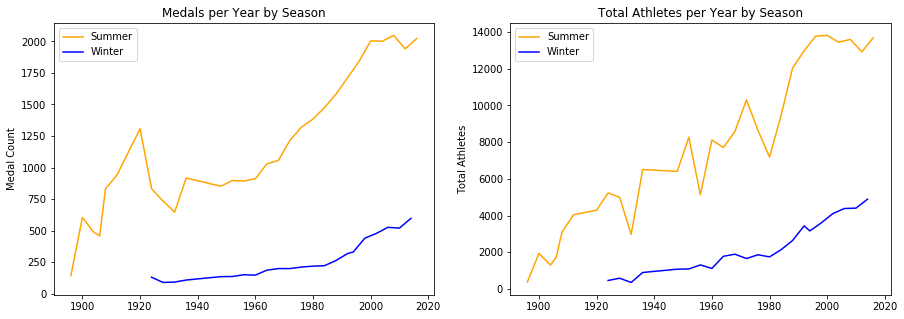

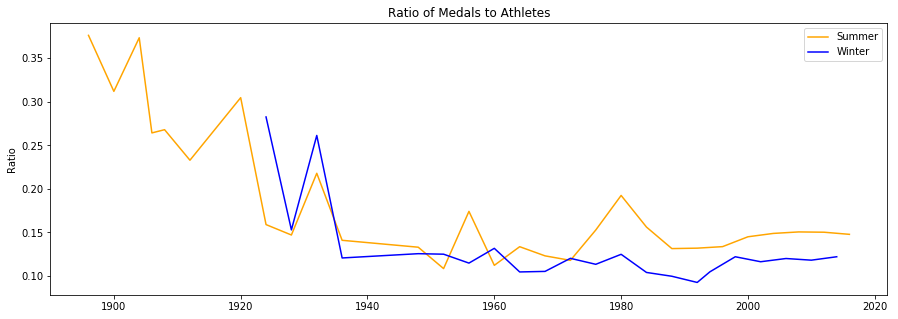

In [4]:
# medals by year separated by season
summer = df[df['Season'] == 'Summer']
winter = df[df['Season'] == 'Winter']
summer_medals_by_year = summer.groupby('Year')['Medal'].count()
winter_medals_by_year = winter.groupby('Year')['Medal'].count()
sum_of_summer_athletes_per_year = summer.groupby('Year')['Name'].count()
sum_of_winter_athletes_per_year = winter.groupby('Year')['Name'].count()

#medals per year by season 
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 5))
summer_medals_by_year.plot(kind='line', ax=ax1, color='orange')
winter_medals_by_year.plot(kind='line', ax=ax1, title='Medals per Year by Season', color='blue')
ax1.set_ylabel('Medal Count')
ax1.set_xlabel('')
leg = ax1.legend(['Summer', 'Winter'])

#total athletes per year by sesason
sum_of_summer_athletes_per_year.plot(kind='line', ax=ax2, color='orange')
sum_of_winter_athletes_per_year.plot(kind='line', ax=ax2, color='blue', title='Total Athletes per Year by Season')
ax2.set_ylabel('Total Athletes')
ax2.set_xlabel('')
leg = ax2.legend(['Summer', 'Winter'])
plt.show()

#ratio of medals to athlete per year
fig = plt.figure(figsize=(15,5))
ratio_summer = summer_medals_by_year/sum_of_summer_athletes_per_year
ratio_summer.plot(kind='line', color='orange')
ratio_winter = winter_medals_by_year/sum_of_winter_athletes_per_year
ratio_winter.plot(kind='line', color='blue', title='Ratio of Medals to Athletes')
plt.ylabel('Ratio')
plt.xlabel('')
leg = plt.legend(['Summer', 'Winter'])
plt.show()

The number of medals won and the number of athletes both increase over the years but what about the competition?  The final plot shows a ratio of the number of medals won divided by the total number of athletes for each year.  This ratio can be considered an expression of the level of competition for each year.  The lower the ratio the higher the degree of competition for that year. Since the number of medals and competitors are both increasing and the level of competition is increasing (i.e. it has become harder to win a medal over time) it must mean that the number of events is increasing as well. 

**How have the events in the games changed over time?**

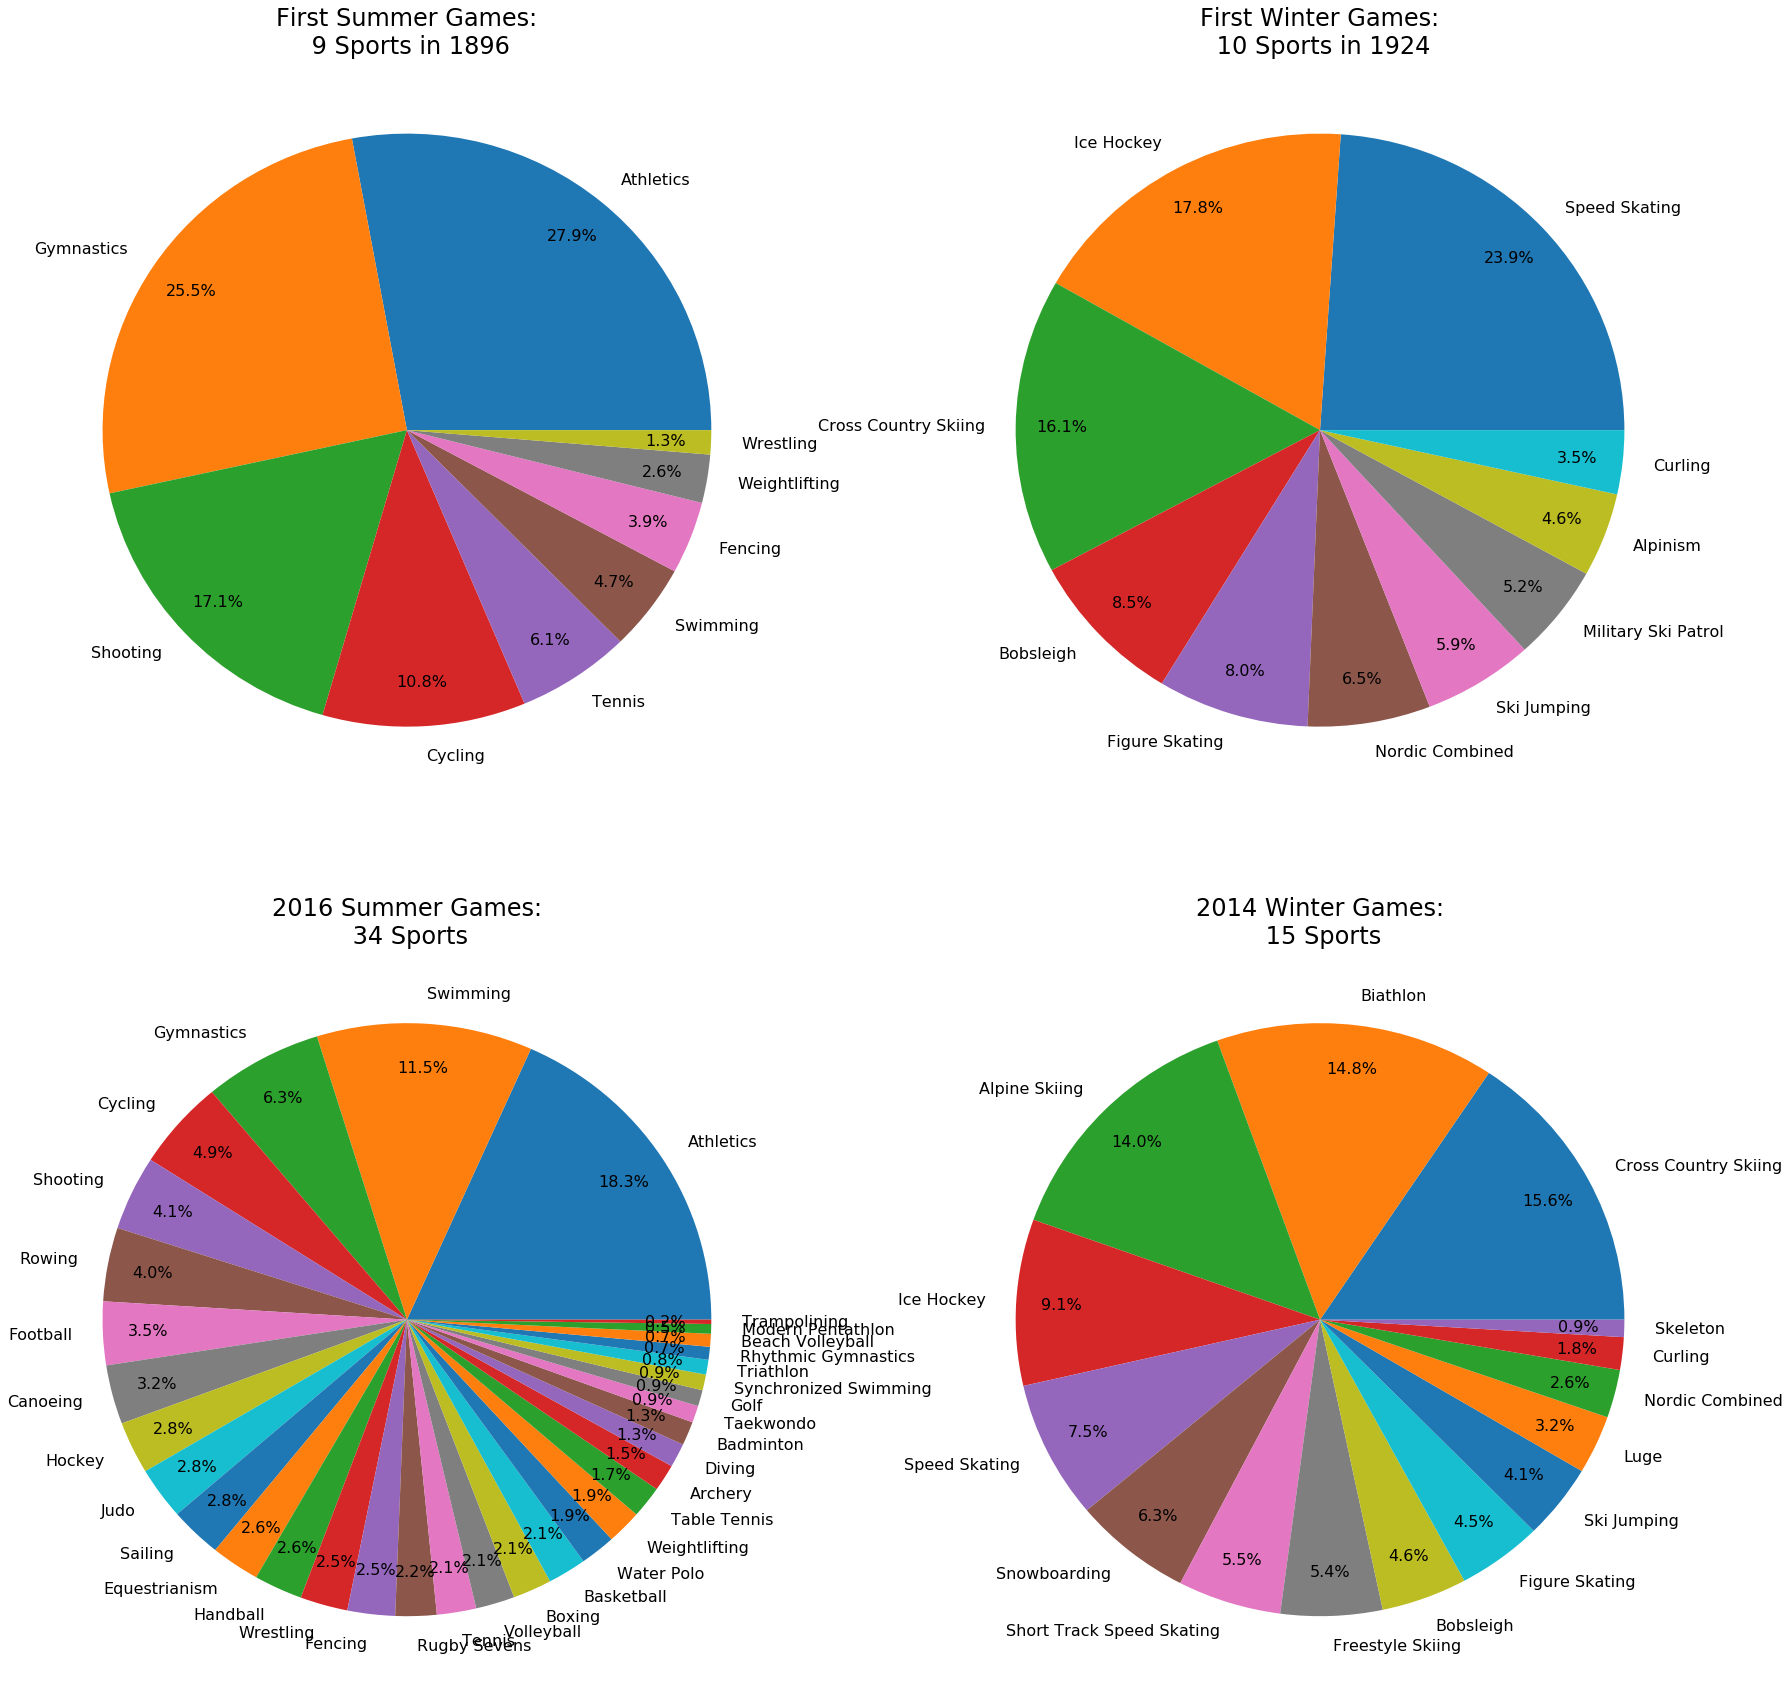

In [5]:
# show pie charts for sports in first year vs most recent year for winter and summer
# first year (summer = 1896)(winter = 1924)

first_summer = df[(df['Season'] == 'Summer') & (df['Year'] == 1896)]
first_winter = df[(df['Season'] == 'Winter') & (df['Year'] == 1924)]

first_summer_counts = first_summer.Sport.value_counts()
first_winter_counts = first_winter.Sport.value_counts()

summer1label = first_summer_counts.index.tolist()
winter1label = first_winter_counts.index.tolist()

#sports for most recent olympics (summer=2016)(winter=2014)
summer2016 = df[(df['Season'] == 'Summer') & (df['Year'] == 2016)]
summer2016_counts = summer2016.Sport.value_counts()
summer2016label = summer2016_counts.index.tolist()

winter2014 = df[(df['Season'] == 'Winter') & (df['Year'] == 2014)]
winter2014_counts = winter2014.Sport.value_counts()
winter2014label = winter2014_counts.index.tolist()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 30))
ax1.set_title('First Summer Games:\n 9 Sports in 1896', fontsize='24')
ax1.pie(first_summer_counts, labels=summer1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax2.set_title('First Winter Games:\n 10 Sports in 1924', fontsize='24')
ax2.pie(first_winter_counts, labels=winter1label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax3.set_title('2016 Summer Games:\n 34 Sports', fontsize='24')
ax3.pie(summer2016_counts, labels=summer2016label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})
ax4.set_title('2014 Winter Games:\n 15 Sports', fontsize='24')
ax4.pie(winter2014_counts, labels=winter2014label, autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 16})

plt.show()

#show the events per sport for the same plots above
first_summer_events = first_summer.set_index('Sport')['Event']
num_events1 = first_summer_events.nunique()
first_summer_events = first_summer_events.sort_index().unique()

first_winter_events = first_winter.set_index('Sport')['Event']
num_events2 = first_winter_events.nunique()
first_winter_events = first_winter_events.sort_index().unique()

summer2016_events = summer2016.set_index('Sport')['Event']
num_events3 = summer2016_events.nunique()
summer2016_events = summer2016_events.sort_index().unique()

winter2014_events = winter2014.set_index('Sport')['Event']
num_events4 = winter2014_events.nunique()
winter2014_events = winter2014_events.sort_index().unique()

#print(first_summer_events)
#print(num_events1)
#print(first_winter_events)
#print(num_events2)
#print(summer2016_events)
#print(num_events3)
#print(winter2014_events)
#print(num_events4)

These pie charts represent the number of sports for the first Olympics and for the most recent games separated by season.  **The percentages are based on the number of athletes that competed in each event of each sport.** The number of sports in the Summer Games has drastically increased, nearly quadrupling from 9 to 34.  The Winter games stayed much more consistant, only increasing from 10 to 15 games.  Each sport represents a category for events.  Under the original 9 sports in the 1896 Summer Games there were events 43 individual events.  The 1924 Winter Olympics had 17 events within the 10 sports. Present day 2016 Summer Games had 306 individual events under 34 different sports and the 2014 Winter Games had 98 under 15 sports.

With the increasing number of medals won, athletes competing, and events held, what is the impact of this on the participating countries?

**What countries have had the most success in the Olympics?**

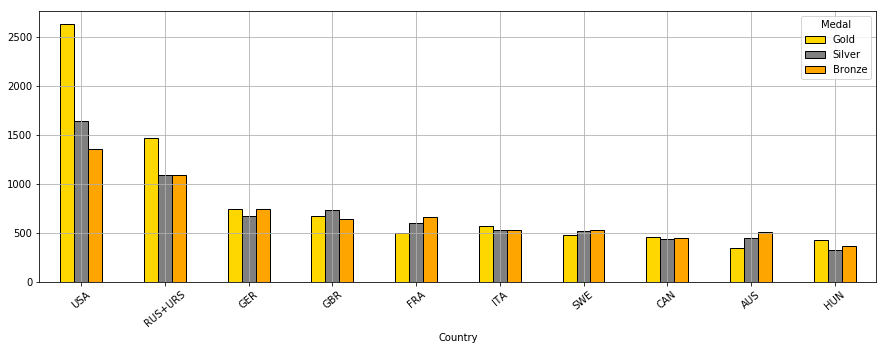

In [7]:
#separate top 10 countries by medal
counted = df.pivot_table(index='NOC', columns='Medal', values='Event', aggfunc='count')
counted['Totals'] = counted.sum(axis='columns')

combo1 = counted.transpose()
combo1['RUS+URS'] = combo1['URS'] + combo1['RUS']
combo1 = combo1.drop(columns=['RUS', 'URS'])
combo1 = combo1.transpose().sort_values('Totals', ascending=False)

top_counted = combo1.iloc[0:10]
top_counted = top_counted[['Gold', 'Silver', 'Bronze']]

top_counted.plot(kind='bar', rot=40, grid=True, color=['gold', 'grey', 'orange'],  edgecolor='black', figsize=(15,5))
plt.xlabel('Country')
plt.show()


The USA has clearly dominated the medal count by country throughout the course of the Olympics.  The second closest country is Russia (including the Soviet Union), which were combined in this plot because they are the same geographic location.  The Olympic games are a global stage for presenting the physical tenacity of a nation in a peaceful manor; therefore, it makes sense to see the most powerful nations grouped up at the top of the medal counts list.  Specifically, seeing the US and Russia as number one and number two makes one think about their rivalry.

**Look at the Olympic rivalry between the United States and Russia**

            ID                             Name Sex   Age  Height  Weight  \
171413   86146         Princess Marie Nigeradze   F   NaN     NaN     NaN   
264181  132204  Aleksandr Yevgenyevich Yakovlev   M  36.0     NaN     NaN   
266894  133532  Sergey Aleksandrovich Yuryevich   M   NaN     NaN     NaN   

          Team  NOC        Games  Year  Season   City             Sport  \
171413  Russia  RUS  1924 Summer  1924  Summer  Paris  Art Competitions   
264181  Russia  RUS  1924 Summer  1924  Summer  Paris  Art Competitions   
266894  Russia  RUS  1924 Summer  1924  Summer  Paris  Art Competitions   

                                     Event Medal  
171413     Art Competitions Mixed Painting   NaN  
264181     Art Competitions Mixed Painting   NaN  
266894  Art Competitions Mixed Sculpturing   NaN  


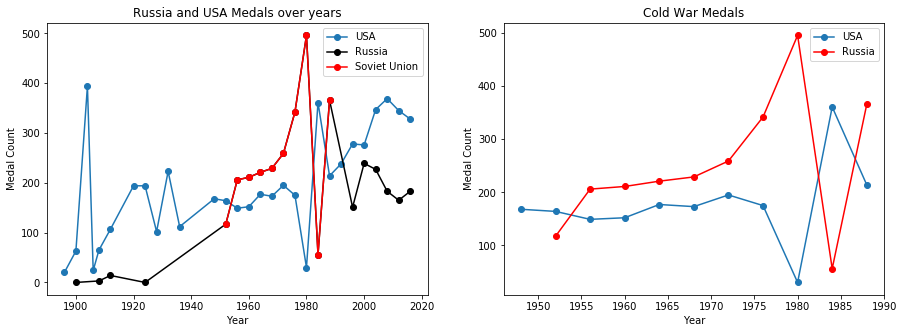

In [8]:
#replace values after 1992 with the sums and drop the winter months
drop_yrs = [1994, 1998, 2002, 2006, 2010, 2014]
rep_yrs = [1996, 2000, 2004, 2008, 2012, 2016]

#grab USA medals alone and add winter and summer after 1994
USA_grouped = df.loc[df.NOC == 'USA'].groupby('Year')['Medal'].count()
usa_split = USA_grouped[USA_grouped.index >= 1994].reset_index()
usa_split_winter = usa_split[usa_split.index % 2 == 0]
usa_split_summer = usa_split[usa_split.index % 2 != 0]
usa_split_winter = usa_split_winter['Medal'].tolist()
usa_split_summer = usa_split_summer['Medal'].tolist()
usa_win_sum_list = [x+y for x,y in zip(usa_split_winter, usa_split_summer)]

#drop winter and add the combined counts
USA_grouped = USA_grouped.drop(drop_yrs)
USA_grouped.loc[rep_yrs] = usa_win_sum_list

#grab RUS medals alone
RUS_grouped = df.loc[(df.NOC == 'RUS') | (df.NOC == 'URS')].groupby('Year')['Medal'].count()
rus_split = RUS_grouped[RUS_grouped.index >= 1994].reset_index()
rus_split_winter = rus_split[rus_split.index % 2 == 0]
rus_split_summer = rus_split[rus_split.index % 2 != 0]
rus_split_winter = rus_split_winter['Medal'].tolist()
rus_split_summer = rus_split_summer['Medal'].tolist()
rus_win_sum_list = [x+y for x,y in zip(rus_split_winter, rus_split_summer)]

#drop winter and add the combined counts
RUS_grouped = RUS_grouped.drop(drop_yrs)
RUS_grouped.loc[rep_yrs] = rus_win_sum_list

#check to make sure RUS was RUS the whole time and nothing else
rus_check = df['NOC'].value_counts()
RUS = df.loc[df.NOC == 'RUS'].groupby('Year').count()
anomaly = df[(df['Year']==1924) & (df['NOC']=='RUS')]
print(anomaly)
URS = df.loc[df.NOC == 'URS'].groupby('Year').count()

#grab the cold war years alone (1947 - 1991)
USA_cold = USA_grouped.loc[1947:1991]
RUS_cold = RUS_grouped.loc[1947:1991]

#plot USA and RUS medals over time
fig, (ax, ax1) = plt.subplots(1, 2, figsize=(15, 5))
USA_grouped.plot(x='Year', kind='line', ax=ax, marker='o')
RUS_grouped.plot(x='Year', kind='line', color='black', title='Russia and USA Medals over years', ax=ax, marker='o')
URS.Medal.plot(kind='line', color='red', ax=ax, marker='o')

ax.set_ylabel('Medal Count')
leg = ax.legend(["USA", 'Russia', "Soviet Union"])

USA_cold.plot(x='Year', kind='line', ax=ax1, marker='o')
RUS_cold.plot(x='Year', kind='line', ax=ax1, title='Cold War Medals', marker='o', color='red')

plt.ylabel('Medal Count')
plt.legend(["USA", 'Russia'])

plt.show()

For consistency, the winter games after 1992 were added to the summer games because prior to 1992 the winter and summer games were played in the same year.  A few things to point out on these plots is that Russia did not compete in every Olympics.  Russia first appeared at the games in 1900 and competed as the Russian Empire for the next two games, 1908 and 1912.  Russia returned to the Olympics as the Soviet Union in 1952 and competed as the USSR until 1988.  The nation of Russia continued to compete after the dissolve of the Soviet Union in 1991.  What stands out from these plots is that the USA won more medals than Russia every single Olympics except for the games that were played during the Cold War (1947 - 1991).  The years during which Russia was most successful over the United States, it was the Soviet Union.  The United States and the Soviet Union both took the Olympics very seriously, using the games as a platform for displaying their nations' power.  The 1980 Summer games, held in Moscow, were boycotted by the USA and 65 other nations as a response to the Soviet invasion of Afghanistan.  The following summer games in 1984, held in Los Angles, were boycotted by Russia and 8 other eastern European nations as a response to the previous year's boycot.  The boycotting nations created an auxilary event for 1984 known as the "Friendship Games".

One event to point out is the Miracle on Ice - US vs URS men's ice hockey which took place in Lake Placid, NY 1980 Winter Olympic Games.  The US men's ice hockey team was able to defeat the x4 Gold Medal defending Soviets in what would become one of the most iconic sports moments in history.  The US men's hockey team would go on to win a gold for the United States in a year where the USA won the least amount of medals since 1906.


*Note: data for 3 Russian Olympians can be found for the 1924 Summer Games in this dataset.  According to the wikipedia page 'Russia at the Olympics' (https://en.wikipedia.org/wiki/Russia_at_the_Olympics) Russia did not compete in the 1924 games.*

Analyzing medals counts for the competing nations isn't the only way to look at this data.  Let's find out what else is interesting in our dataset.

**Search for the unique values in each column**

In [9]:
# get a list of all the unique values in the data set

#names = df['Name'].unique()
#print(len(names))
#print(df.Name.nunique())

for x in df.columns:
    a = str(x)
    s = str(df[x].nunique())
    print(a + ' = ' + s)

ID = 135571
Name = 134732
Sex = 2
Age = 74
Height = 95
Weight = 220
Team = 1184
NOC = 230
Games = 51
Year = 35
Season = 2
City = 42
Sport = 66
Event = 765
Medal = 3


There are 74 unique ages!? That is an awfully large spread for some of the most competitive events in the world. 

**What is the distribution of ages in the Olympics?**

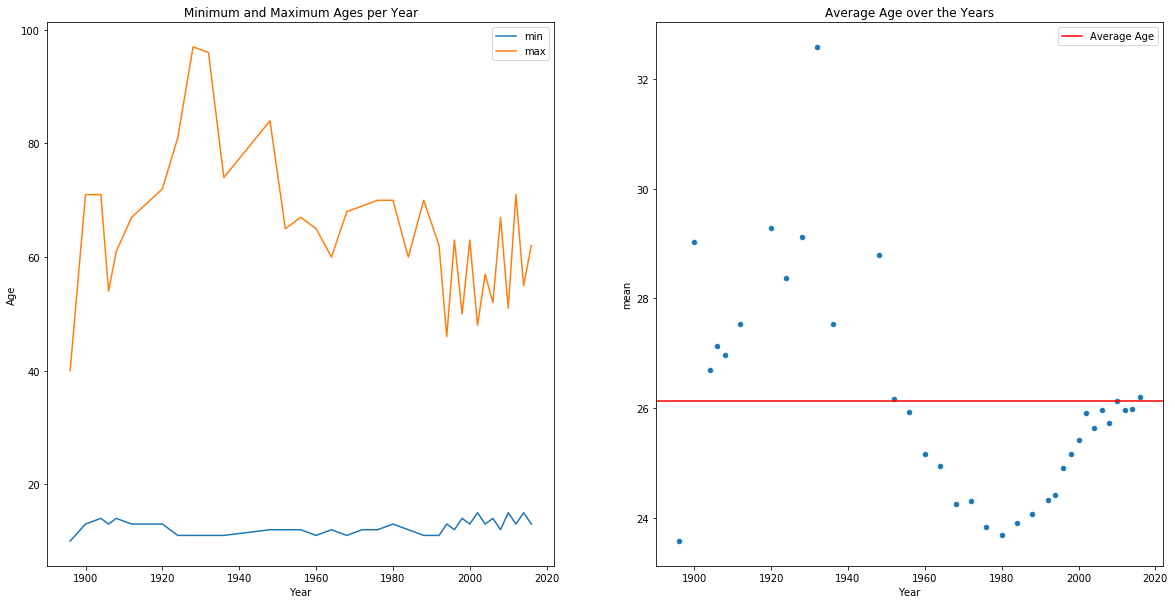

In [10]:
# look at age distribution and where max and min occur

age = df.groupby('Year').agg({'Age':['min','max','mean']})
age.columns = age.columns.droplevel()
age = age.reset_index()
avg_age = age['mean'].mean()
age['Delta'] = age['max'] - age['min']

#find out what countries send the youngest competitors
youngest_ages = [10, 11, 12, 13, 14, 15]
youngest = df[df['Age'].isin(youngest_ages)]
young1 = youngest['NOC'].unique()


#find who was the extreme competitors and what team/event he competed in
oldest = df.loc[df['Age'].idxmax()]
youngest_athlete = df.loc[df['Age'].idxmin()]

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

age.plot(x='Year', y=['min', 'max'], kind='line', title='Minimum and Maximum Ages per Year', ax=ax1)
ax1.set_ylabel('Age')
age.plot(x='Year', y='mean', kind='scatter', title='Average Age over the Years', ax=ax2)
plt.axhline(avg_age, xmin=0, xmax=1, color='r', label='Average Age')
plt.legend()

plt.show()

The youngest competitors came from 157 different countries, with the youngest athlete being **Dimitrios Loundras**, age 10, from Greece.  He competed in the 1896 Summer Games in Athina (Athens) for Greece in *Gymnastics*, specifically the *men's parallel bars*.  **Loundras** was the bronze medal winner in the event.  The maximum age is 97 for athlete **John Quincy Adams Ward**, who competed for **TEAM USA** in *Art Competitions* in the 1928 Summer games in Amsterdam.  One thing to point out is the oscillation of the average ages in competitors over the years that appears to be converging to the average age.  This could be due to the increasing number of competitors and increasing competition, which was observed previously.

Interestingly, the youngest athletes in almost every Olympics are still in middle school.  Of all the youngest athletes competing in any Olymipcs the oldest is just 15 years old!

# Future thoughts and final considerations

Moving forward, adding new ways of comparing the countries could make for improved analysis.  Adding data about GDP or size of country we could look at how the wealth or size of a nation plays into the total number of medals won or athletes sent.

Specific questions to ask....
1. look at the top nations again.  Find out what is the percentage of athletes who medal out of the total number of athletes sent from that nation.  Do the same nations come to the top when ranked according to percent medalled athlete?
2. Breakdown games into events and try to figure out how the competition per event has changed.  Are the total number of athletes competing in an event increasing while the number of medals available stays the same?
3. Look at the impact of global events on Olympics.  Did the world wars cause more or less athletes to compete in the following years.  What other major events have impacted the Olympic turn out?

I would like to somehow incorporate a machine learning element into this project.  To start a task like this a question needs to be asked.  Being able to predict what nation will win a medal seems a little difficult, but perhaps predicting the number of medals a nation in the top 10 might win in the upcoming Olympics would be more managable.  

Another analysis to consider is normalizing to see how the medals are distributed or the athletes compare without bias.  The code below has attempted this.  The first attempt was done by 'normalizing' medals and athletes per year on the total number of medals and athletes respectively.  The latter attempt was done by using the 'max/min normalization' (y=(x - xmin)/(xmax - xmin)) for medals and athletes each year.

If I were to continue down the path of normalization, I would want to see if the top countries (by medal) still stand out as the top countries.  I wanted a way to normalize the nations based on the number of athletes sent in attempts to remove bias.  One would imagine that as a nation sends more competitors they would likely win more medals.  I would like to create a way to compare a nation's success against another directly.  It makes sense that if every competitor sent from a particular nation wins a medal than that nation would be considered to have done better in those games than a nation who sent more competitors than medals won.  I have started looking at the ratio of medals to athletes for each nation for each year to try and accomplish this challenge.



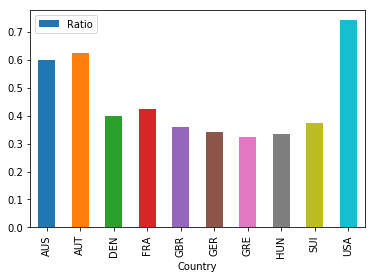

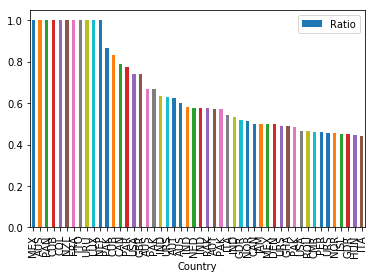

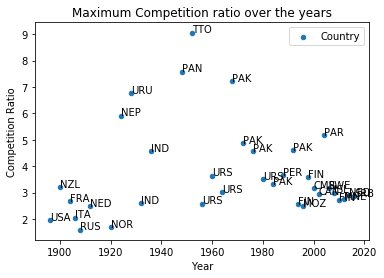

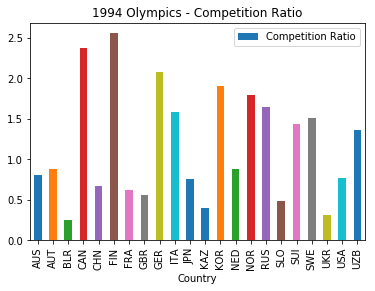

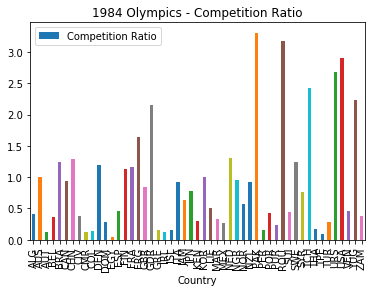

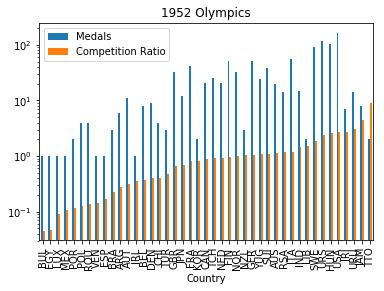

In [11]:
#sort by year and NOC
athletes_per_year = df.groupby('Year')[['Name', 'Medal']].count()
athletes_per_year.columns=['Total Athletes', 'Total Medals']
grouped_NOC = df.groupby(['Year','NOC'])['Name', 'Medal'].count()
test = pd.DataFrame(grouped_NOC).reset_index()
merge1 = pd.merge(athletes_per_year, test[['Year', 'NOC', 'Medal', 'Name']], how='outer', on='Year')
merge1.columns = ['Year', 'Total Athletes', 'Total Medals', 'Country', 'Medals', 'Athletes']

# normalized medals is the number of medals won per country for each year divided by the total number of medals won for that year
merge1['Normalized Medals'] = merge1.Medals/merge1['Total Medals']

# normalized athletes is number of athletes per country normalized by total number of athletes competeting for that year
merge1['Normalized Athletes'] = merge1.Athletes/merge1['Total Athletes']

# this is a comparision of the normalized medals to normalized athletes per year - GARBAGE!
merge1['Competition Ratio'] = merge1['Normalized Medals']/merge1['Normalized Athletes']
merge1['Ratio'] = merge1['Medals']/merge1['Athletes']

merge1a = merge1.drop(columns=['Total Athletes', 'Total Medals'])
#drop zeros from competition ratio
drop_zero = merge1a['Medals']==0
merge1a = merge1a.drop(merge1a.index[drop_zero]).set_index(['Year', 'Country'])
test = merge1a.reset_index()
test1 = test[test.Year == 1896]

test = test.sort_values(by='Ratio', ascending=False).head(50)
test1.plot(kind='bar', x='Country', y="Ratio")
plt.show()
test.plot(kind='bar', x='Country', y='Ratio')
plt.show()

# plot competition ratio over time for USA
comp_usa = merge1[merge1['Country'] == 'USA']
comp_usa = comp_usa.set_index('Year')
comp_ratio_usa = comp_usa['Competition Ratio']
#comp_ratio_usa.plot(kind='line', title='USA competiton ratio over the years')

#Maximum competition ratio for each year
# *** want to create a list of Country names for each max value to display on plot ***
tot_comp_ratio = merge1[['Year', 'Competition Ratio']]
max_comp_ratio = tot_comp_ratio.groupby('Year').max()
max_comp_ratio = pd.DataFrame(max_comp_ratio).reset_index()
#print(merge1a.loc[1952])

#max_comp_ratio.plot(x='Year', y='Competition Ratio', kind='scatter', title='Maximum Competition ratio over the years')
plt.show()


#start with merge1a and unstack and calcualte max on competition ratio to find associated Country
max_country_comp = pd.DataFrame(merge1a).reset_index()
list_of_max_values = max_country_comp.groupby('Year')['Competition Ratio'].max().tolist()

max_country_comp = max_country_comp[['Competition Ratio', 'Country', 'Year']]
max_country_comp = max_country_comp.set_index('Year')
max_country_comp = max_country_comp.groupby(['Year', 'Competition Ratio'])['Country'].max()
max_country_comp = max_country_comp.loc[:,list_of_max_values]

country_names = pd.DataFrame(max_country_comp).reset_index()
list_of_max_names = country_names['Country'].tolist()
#print(max_country_comp)
#print(list_of_max_values)
#print(len(list_of_max_values))
#print(list_of_countries_max)
#print(type(country_names))
#print(country_names)
#print(list_of_max_names)

#fig = plt.figure(figsize=(10,10))
country_names.plot(kind='scatter', x='Year', y='Competition Ratio', label='Country', title='Maximum Competition ratio over the years')
#list of max names = list of Country names associated with max competition ratio -> use as label for scatter plot
#create list of years -> years
years = country_names.Year.tolist()
#print(years)

#create list of competition ratio -> comp_ratio
comp_ratio = country_names['Competition Ratio'].tolist()
#print(comp_ratio)

for label, x, y in zip(list_of_max_names, years, comp_ratio):
    #print(label)
    #print(x)
    #print(y)
    plt.annotate(label, xy=(x, y))
plt.show()


#print(comp_ratio_usa.idxmin())
#print(comp_ratio_usa.idxmax())
#print(merge1a.loc[comp_ratio_usa.idxmin()])
#print(merge1a.loc[comp_ratio_usa.idxmax()])

min_comp = merge1a.loc[[comp_ratio_usa.idxmin()],['Competition Ratio']]
max_comp = merge1a.loc[[comp_ratio_usa.idxmax()],['Competition Ratio']]
min_comp = pd.DataFrame(min_comp).reset_index()
max_comp = pd.DataFrame(max_comp).reset_index()
#print(min_comp)
min_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1994 Olympics - Competition Ratio')
plt.show()
plt.clf()
plt.close()

#fig = plt.figure(figsize=(10,10))
max_comp.plot(kind='bar', x='Country', y='Competition Ratio', title='1984 Olympics - Competition Ratio')
plt.show()

#lets take a look at the 1952 olympics
df1952 = merge1a.loc[1952]
#print(df1952[['Medals', 'Athletes', 'Competition Ratio']])
#print(merge1a)
df1952_medals_comp_ratio = df1952[['Medals', 'Competition Ratio']]
df1952_medals_comp_ratio = df1952_medals_comp_ratio[df1952_medals_comp_ratio.Medals != 0].sort_values("Competition Ratio")
df1952_medals_comp_ratio.plot(kind='bar', logy=True, title='1952 Olympics')
plt.show()

These plots are based on a value created for visualition called the competition ratio.  The competition ratio is the ratio of "normalized" medals to "normalized" athletes.  These "normalized" values are found by dividing the number of medals and atheletes by the total number of medals and athletes per year.  This competition ratio can be considered a measure of the rank for each country for each year.  It is a numeric representation of the number medals won divided by number of athletes per country both normalized by their totals per year.  The last plot shows the total medals vs the competition ratio for the countries competing in the 1952 olympic games.  This was selected because it contained the maximum competition ratio value in the set.  This occurred for TTO (Trinidad and Tobago) in 1952 when they sent 2 athletes and they both won medals.  More accurate normalization will follow...


**THIS REALLY IS JUST MULTIPLYING THE RATIO OF MEDALS TO ATHLETES BY THE CONSTANT (TOTAL ATHLETES/TOTAL MEDALS) FOR THAT YEAR**

COMP RATIO IS NO GOOD...

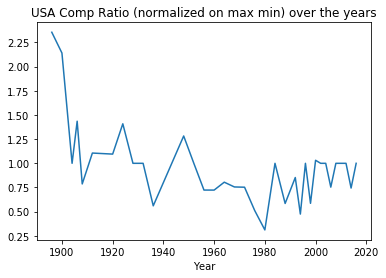

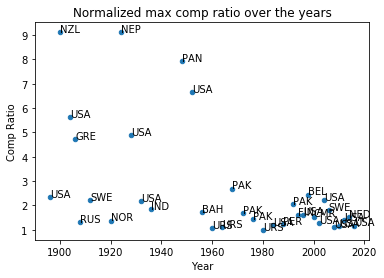

In [12]:
# Lets look at the Athletes, number of medals, and countries grouped by year normalized on min max
# of athletes and medals per year

#print(df.head())
year = df.groupby(['Year', 'NOC']).agg({'Name':'count', 'Medal':'count'})

yearlist = df['Year'].sort_values().unique()
#print(yearlist)

min_athlete = []
max_athlete = []
min_medal = []
max_medal = []

for yr in yearlist:
    min_athlete.append(year.loc[yr].min()[0])
    max_athlete.append(year.loc[yr].max()[0])
    min_medal.append(year.loc[yr].min()[1])
    max_medal.append(year.loc[yr].max()[1])

min_athlete = np.array(min_athlete)
max_athlete = np.array(max_athlete)
min_medal = np.array(min_medal)
max_medal = np.array(max_medal)
Athlete_Delta = max_athlete - min_athlete
Medal_Delta = max_medal - min_medal

year = year.reset_index()
year = year.set_index('Year')
temp = zip(min_athlete, Athlete_Delta, min_medal, Medal_Delta)
temp1 = zip(yearlist, temp)
Delta = dict(temp1)
#print(Delta)
df_delta = pd.DataFrame(Delta)
df_delta = df_delta.transpose()
df_delta = df_delta.reset_index()
df_delta.columns = ['Year','Athlete Min','Athlete Delta', 'Medal Min', 'Medal Delta']
df_delta = df_delta.set_index('Year')
#print(df_delta)
#print(year)

#print(df.groupby('Year')['Medal'].count())

norm_df = pd.merge(year, df_delta, left_on='Year' , right_on='Year', how='outer')
norm_df = norm_df.reset_index()
norm_df.columns = ['Year', 'Country', 'Athlete', 'Medals', 'Athlete Min', 'Athlete Delta', 'Medal Min', 'Medal Delta']
norm_df['Normalized Athletes'] = (norm_df['Athlete'] - norm_df['Athlete Min'])/norm_df['Athlete Delta']
norm_df['Normalized Medals'] = (norm_df['Medals'] - norm_df['Medal Min'])/norm_df['Medal Delta']
norm_df['Comp Ratio'] = norm_df['Normalized Medals']/norm_df['Normalized Athletes']
norm_df = norm_df[['Year', 'Country', 'Athlete', 'Medals', 'Normalized Athletes', 'Normalized Medals', 'Comp Ratio']]
norm_df = norm_df.set_index(['Year', 'Country'])

#print(norm_df.head())

# we need to fix the inf and NaN values in the Comp Ratio column
mask = norm_df['Comp Ratio'] != np.inf
norm_df.loc[~mask, 'Comp Ratio'] = norm_df.loc[mask, 'Comp Ratio'].max()
norm_df = norm_df.fillna(0)

#print(norm_df)

# lets look at the same plots as above using the max min normalized data
# USA comp ratio over time

USA = norm_df.loc[(slice(None), 'USA'),:]
USA = USA.reset_index()
USA = USA.set_index('Year')
USA = USA['Comp Ratio']
USA.plot(kind='line', title='USA Comp Ratio (normalized on max min) over the years')
plt.show()

#grab list of countries by max comp ratio and list of x and y coordinates to label on scatter plot
countries = norm_df.reset_index()
countries_list = countries.groupby(['Year', 'Comp Ratio'])['Country'].max()

max_comp_ratio_list = norm_df.groupby('Year').max()
max_comp_ratio_list = max_comp_ratio_list['Comp Ratio'].tolist()

countries_list = countries_list.loc[:, max_comp_ratio_list]
countries_list = pd.DataFrame(countries_list).reset_index()
countries_list = countries_list.groupby('Year').max()
countries_list = countries_list['Country'].tolist()
#print(countries_list)


# lets plot the max comp ratio vs time
max_comp = norm_df.groupby('Year').max()
#print(max_comp)
max_comp = max_comp.reset_index()
max_comp.plot(kind='scatter', x='Year', y='Comp Ratio', title='Normalized max comp ratio over the years')

year = max_comp_ratio['Year'].tolist()
for label, x, y in zip(countries_list, year, max_comp_ratio_list):
    plt.annotate(label, xy = (x, y))
plt.show()


In [6]:
#create a data table grouped by year and sport for the first and present games
my_dict_sum = dict({'First Summer Games':summer1label, '2016 Summer Games':summer2016label})
my_dict_win = dict({'First Winter Games':winter1label, '2014 Winter Games':winter2014label})
pie_table_sum = pd.DataFrame.from_dict(my_dict_sum, orient='index')
pie_table_win = pd.DataFrame.from_dict(my_dict_win, orient='index')

print(pie_table_sum.transpose()[['First Summer Games', '2016 Summer Games']])
print(pie_table_win.transpose()[['First Winter Games', '2014 Winter Games']])


   First Summer Games      2016 Summer Games
0           Athletics              Athletics
1          Gymnastics               Swimming
2            Shooting             Gymnastics
3             Cycling                Cycling
4              Tennis               Shooting
5            Swimming                 Rowing
6             Fencing               Football
7       Weightlifting               Canoeing
8           Wrestling                 Hockey
9                None                   Judo
10               None                Sailing
11               None          Equestrianism
12               None               Handball
13               None              Wrestling
14               None                Fencing
15               None           Rugby Sevens
16               None                 Tennis
17               None             Volleyball
18               None                 Boxing
19               None             Basketball
20               None             Water Polo
21        